# 연습문제


## numpy

python에서 array등을 다루는 수학/과학 컴퓨팅을 하기 위한 패키지

## matplotlib

python에서 matlab과 유사한 그래프 표시를 가능하게 하는 패키지

In [ ]:
# Cell 클릭 후 Shift+Enter로 실행 (Comment는 #으로 시작)

# Install necessary packages
!pip install numpy
!pip install matplotlib

## numpy
(본 cell은 markdown 형식으로, 더블클릭/Enter로 들어가고 Shift+Enter로 나갈 수 있다. 주석 용으로 사용.)  

python에서 과학 컴퓨팅을 하기 위해 사용하는 패키지로 python 라이브러리로 Import 하여 사용.

In [ ]:
# 패키지 사용을 위한 약자 지정

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Lab_1: Perceptron
---
Perceptron 알고리즘 구현하기
아래 이름, 학번을 작성하세요.

In [ ]:
lab1_student_id = '20161641'
lab1_student_name = '정성엽'

## Practice 1

아래의 train_perceptron 알고리즘을 구현하시오.

```np.random.seed``` 

random number(난수) 발생을 위한 조건 설정. 괄호 안의 숫자에 따라 난수 생성 방식이 다르게 고정됨

(https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.seed.html)



In [ ]:
# Do not change
np.random.seed(5)

```np.random.multivariate_normal```

multivariate normal distribution 으로부터 random sample 을 추출

https://numpy.org/doc/stable/reference/random/generated/numpy.random.multivariate_normal.html

In [ ]:
num_data = 20

# feature dataset

class_zeros = np.random.multivariate_normal(mean=[0, 0], cov=[[1., .95],[.95, 1.]], size=num_data)
class_ones = np.random.multivariate_normal(mean=[1, 5], cov=[[1., .85],[.85, 1.]], size=num_data)

print(f'class_zeros: \n{class_zeros} \nclass_ones: \n{class_ones}')

class_zeros: 
[[-3.83362070e-01 -4.87992399e-01]
 [-2.36033497e+00 -2.44005350e+00]
 [-3.58443281e-01  1.41981188e-01]
 [ 9.91341033e-01  8.04249095e-01]
 [-1.33086323e-01 -2.37400363e-01]
 [ 1.21015451e+00  1.14536687e+00]
 [ 2.58897957e-01  4.49732434e-01]
 [ 1.75455499e+00  1.53313893e+00]
 [-1.43057734e+00 -8.43237710e-01]
 [ 1.39021091e+00  1.59412960e+00]
 [ 1.10375308e+00  8.32792324e-01]
 [ 9.27716082e-01  7.94107344e-01]
 [-1.09654919e+00 -8.71261800e-01]
 [-9.55767122e-04 -1.15844755e-01]
 [ 1.35016013e-02 -1.99965457e-02]
 [-6.83217166e-01 -8.82937652e-01]
 [ 2.20971746e-02 -9.86321054e-03]
 [ 1.22453888e-02  9.10549322e-02]
 [-4.06231793e-01  1.58843897e-02]
 [-1.61117147e-01  3.32682722e-01]] 
class_ones: 
[[ 1.42499215  5.16332788]
 [ 0.80577228  5.00045395]
 [ 0.38687635  5.09451383]
 [-0.23119307  4.03962309]
 [ 1.35103223  5.29592348]
 [-0.41995562  3.70123025]
 [ 2.44950645  6.07181602]
 [ 1.23989017  5.87097871]
 [ 0.48411129  5.72202275]
 [ 0.33430386  4.40266337]
 

```np.vstack, np.hstack```

배열을 각각 vertically, horizontally stacking 함


https://numpy.org/doc/stable/reference/generated/numpy.vstack.html?highlight=vstack#numpy.vstack

https://numpy.org/doc/stable/reference/generated/numpy.hstack.html?highlight=hstack#numpy.hstack

In [ ]:
biases = np.ones((2 * num_data, 1))

class_data = np.vstack((class_zeros, class_ones)).astype(np.float32)

features = np.hstack((biases, class_data))

print(f'biases: \n{biases} \nclass_data: \n{class_data} \nfeatures: \n{features}')
print(f'biases.shape: \n{biases.shape} \nclass_data.shape: \n{class_data.shape} \
\nfeatures.shape: \n{features.shape}')

biases: 
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]] 
class_data: 
[[-3.8336208e-01 -4.8799241e-01]
 [-2.3603349e+00 -2.4400535e+00]
 [-3.5844329e-01  1.4198118e-01]
 [ 9.9134105e-01  8.0424911e-01]
 [-1.3308632e-01 -2.3740037e-01]
 [ 1.2101545e+00  1.1453669e+00]
 [ 2.5889796e-01  4.4973242e-01]
 [ 1.7545550e+00  1.5331390e+00]
 [-1.4305774e+00 -8.4323770e-01]
 [ 1.3902109e+00  1.5941296e+00]
 [ 1.1037531e+00  8.3279234e-01]
 [ 9.2771608e-01  7.9410732e-01]
 [-1.0965492e+00 -8.7126178e-01]
 [-9.5576711e-04 -1.1584476e-01]
 [ 1.3501601e-02 -1.9996546e-02]
 [-6.8321717e-01 -8.8293767e-01]
 [ 2.2097174e-02 -9.8632108e-03]
 [ 1.2245389e-02  9.1054931e-02]
 [-4.0623179e-01  1.5884390e-02]
 [-1.6111715e-01  3.3268273e-01]
 [ 1.4249922e+00  5.1633277e+00]
 [ 8.0577230e-01  5.0004539e+00]
 [ 3.86876

In [ ]:
# Label dataset

label_zeros = np.zeros((num_data, 1))
label_ones = np.ones((num_data, 1))

labels = np.vstack((label_zeros, label_ones))
dataset = np.hstack((features,labels))

print(f'labels: \n{labels} \ndataset: \n{dataset}')

labels: 
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]] 
dataset: 
[[ 1.00000000e+00 -3.83362085e-01 -4.87992406e-01  0.00000000e+00]
 [ 1.00000000e+00 -2.36033487e+00 -2.44005346e+00  0.00000000e+00]
 [ 1.00000000e+00 -3.58443290e-01  1.41981184e-01  0.00000000e+00]
 [ 1.00000000e+00  9.91341054e-01  8.04249108e-01  0.00000000e+00]
 [ 1.00000000e+00 -1.33086324e-01 -2.37400368e-01  0.00000000e+00]
 [ 1.00000000e+00  1.21015453e+00  1.14536691e+00  0.00000000e+00]
 [ 1.00000000e+00  2.58897960e-01  4.49732423e-01  0.00000000e+00]
 [ 1.00000000e+00  1.75455499e+00  1.53313899e+00  0.00000000e+00]
 [ 1.00000000e+00 -1.43057740e+00 -8.43237698e-01  0.00000000e+00]
 [ 1.00000000e+00  1.39021087e+00  1.59412956e+00  0.00000000e+00]
 [ 1.00000000e+00  1.10375309e+00  8.32792342e-01  0.00000000e+00]
 [

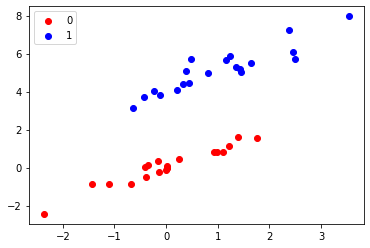

In [ ]:
plt.scatter(features[:, 1][:num_data], features[:, 2][:num_data], c = 'r', label='0')
plt.scatter(features[:, 1][num_data:], features[:, 2][num_data:], c = 'b', label='1')

plt.legend()
plt.show()

In [ ]:
# dataset shuffling
np.random.shuffle(dataset)

split_ratio = 0.7

# splitting dataset
train = dataset[0:int(split_ratio * (num_data * 2))]
test = dataset[int(split_ratio * (num_data * 2)):(num_data * 2)]

print(train.shape, test.shape)

(28, 4) (12, 4)


In [ ]:
# reshaping data
x_train = train[:, 0:3]
y_train = train[:, 3]

x_test = test[:, 0:3]
y_test = test[:, 3]

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(28, 3) (28,)
(12, 3) (12,)


In [ ]:
print(x_train[0])
print(y_train[0])

[ 1.         -0.12344763  3.83624363]
1.0


In [ ]:
# Todo: practice 1
"""
# y의 값으로 0과 1을 그대로 사용하는 경우입니다.
def train_perceptron_test1(w, x, y, epoch=30):
    #print(w)
    for i in range(epoch):
        wx = np.dot(x,w)
        wx[wx>=0] = 1
        wx[wx<0] = 0
        err = wx - y
        #print(err) 
        err = err.reshape(-1,1)
        erx = x * err
        w -= erx.sum(axis = 0)
    #print(w)
    return w
"""
# y의 값으로 0과 1이 입력되는데, 0은 -1로, 1은 1로 변환하여 알고리즘을 구현하였습니다.
def train_perceptron(w, x, y, epoch=30):
    # y의 값 중 0인 경우 -1로 변환합니다.
    y[y<0.5] = -1 
    # y2 = y + np.ones(len(y)) * (y-1) # y = y + y-1 변환

    # epoch에 도달할 때까지 weight의 update를 수행합니다.
    for i in range(epoch): 

        # y가 (n,)의 형태로 1차원임으로 연산과정에서 brodecasting이 정상적으로 수행되지 않습니다.
        # 때문에 reshape 함수를 사용하여 1차원을 증가시켜 (n,1)으로 형태를 변환합니다.
        y = y.reshape(-1,1) 

        # y와 x의 element wise 곱 연산을 수행합니다.
        # y는 x의 크기로 broadcast 됩니다.
        yx = x*y

        # weight w와 yx를 dot product 합니다.
        # 이제 error에 해당하는 값들은 연산 결과가 음수일 것입니다.
        # y⋅w⋅x >= 0 (good)
        # y⋅w⋅x < 0 (misclassified)
        wyx = np.dot(yx,w)

        # wyx의 값이 음수인 index들만 update에 사용됨으로 해당 값들만을 따로 저장합니다.
        yx = yx[wyx<0]

        # misclassified 된 원소들의 yx 값들을 모두 summation 한 후 w에 더해줍니다.
        w += yx.sum(axis = 0)
    
    # -1로 변환해주었던 값을 다시 0으로 되돌려 줍니다.
    y[y<-0.5] = 0

    # 계산된 w를 return 합니다.
    return w

# TEST용 코드
#w = np.random.rand(len(x_train[0]))
#w = train_perceptron(w, x_train, y_train)

In [ ]:
# w 와 x1 을 이용해 x2 값을 구함

def x2(x1, w):
    w0 = w[0]
    w1 = w[1]
    w2 = w[2]
    x2 = []
    for i in range(len(x1 - 1)):
        x2_temp = (-w0 -w1 * x1[i]) / w2
        x2.append(x2_temp)
    return x2

# visualizaing decision boundary

def show_plt(w, class_data, labels):
#   w and class_data are 2-element with no bias, and 3-element with bias
    len_w = len(w)
    sh_data = class_data.shape
    if len_w != sh_data[1]:
        print('error: w and data dimension does not match')
        return
    
    if len_w == 3:
        class_data = class_data[:,1:]
        
    min = np.min(class_data[:, 0])
    max = np.max(class_data[:, 0])
    
    x1 = np.linspace(min, max, 100)
    x1 = x1.reshape(len(x1),1)
    x_2 = np.asarray(x2(x1, w))
    
    data_zeros = class_data[labels == 0]
    data_ones = class_data[labels == 1]
    
    plt.scatter(data_zeros[:, 0], data_zeros[:, 1], c = 'r', label='0')
    plt.scatter(data_ones[:, 0], data_ones[:, 1], c = 'b', label='1')
    plt.plot(x1, x_2)

    plt.legend()
    plt.show()
    

(3,) (28, 3)


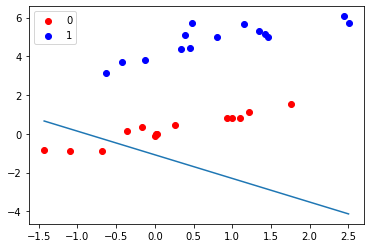

In [ ]:
w = np.random.rand(len(x_train[0]))
print(w.shape, x_train.shape)

show_plt(w, x_train, y_train)

In [ ]:
w = train_perceptron(w, x_train, y_train)

print("The weights are:", w)

# Do not change
lab1_student_answer_w = w

The weights are: [-29.17999874 -18.31183293  38.29983915]


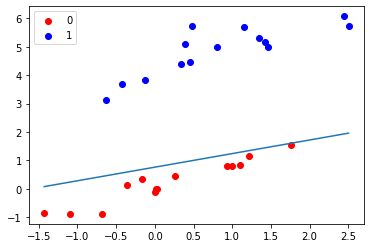

In [ ]:
show_plt(w, x_train, y_train)

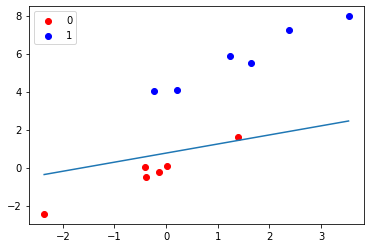

In [ ]:
show_plt(w, x_test, y_test)

## Practice 2

hyperplane이 구해지는 최소 epoch를 출력할 수 있도록 train_perceptron 코드를 수정하시오.

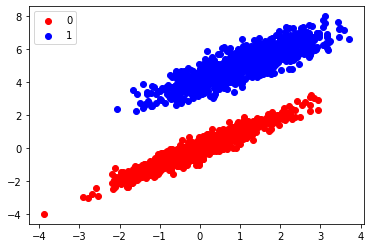

In [ ]:
num_data = 1000

class_zeros = np.random.multivariate_normal(mean=[0,0], cov=[[1.,.95],[.95,1.]], size=num_data)
class_ones = np.random.multivariate_normal(mean=[1,5], cov=[[1.,.85],[.85,1.]], size=num_data)

biases = np.ones((2 * num_data, 1))

class_data = np.vstack((class_zeros, class_ones)).astype(np.float32)

features = np.hstack((biases, class_data))

label_zeros = np.zeros((num_data, 1))
label_ones = np.ones((num_data, 1))

labels = np.vstack((label_zeros, label_ones))
dataset = np.hstack((features,labels))

plt.scatter(features[:, 1][:num_data], features[:, 2][:num_data], c = 'r', label='0')
plt.scatter(features[:, 1][num_data:], features[:, 2][num_data:], c = 'b', label='1')

plt.legend()
plt.show()

In [ ]:
np.random.shuffle(dataset)

split_ratio = 0.7

train = dataset[0:int(split_ratio * (num_data * 2))]
test = dataset[int(split_ratio * (num_data * 2)):(num_data * 2)]

x_train = train[:, 0:3]
y_train = train[:, 3]

x_test = test[:, 0:3]
y_test = test[:, 3]


# Todo: practice 2
# y의 값으로 0과 1이 입력되는데, 0은 -1로, 1은 1로 변환하여 알고리즘을 구현하였습니다.
def train_perceptron(w, x, y, epoch=30):
    min_epoch = epoch

    # y의 값 중 0인 경우 -1로 변환합니다.
    y[y<0.5] = -1 

    # epoch에 도달할 때까지 weight의 update를 수행합니다.
    for i in range(epoch): 

        # y가 (n,)의 형태로 1차원임으로 연산과정에서 brodecasting이 정상적으로 수행되지 않습니다.
        # 때문에 reshape 함수를 사용하여 1차원을 증가시켜 (n,1)으로 형태를 변환합니다.
        y = y.reshape(-1,1) 

        # y와 x의 element wise 곱 연산을 수행합니다.
        # y는 x의 크기로 broadcast 됩니다.
        yx = x*y

        # weight w와 yx를 dot product 합니다.
        # 이제 error에 해당하는 값들은 연산 결과가 음수일 것입니다.
        # y⋅w⋅x >= 0 (good)
        # y⋅w⋅x >= 0 (misclassified)
        wyx = np.dot(yx,w)

        # 만약 wyx 중 음수가 없다면 missclassify 된 원소가 없다는 뜻이고, 더이상 w의 갱신이 이루어지지 않습니다.
        # 즉 Hyperplane이 구해지는 최소 epoch, min_epoch는 현재 i가 됩니다. (i가 0부터 시작하기 때문에 1을 뺄 필요가 없습니다)
        # Practice의 조건으로 최소 epoch를 구하되, w는 epoch만큼 update를 하라고 명시되어 있음으로,
        # 먼저 min_epoch가 이전에 minimum으로 갱신된 적이 있는지 확인하고,
        # any 함수를 사용해 wyx 배열에 음수가 있는지 확인합니다.
        if min_epoch > i and not np.any(wyx<0):
            min_epoch = i

        # wyx의 값이 음수인 index들만 update에 사용됨으로 해당 값들만을 따로 저장합니다.
        yx = yx[wyx<0]

        # misclassified 된 원소들의 yx 값들을 모두 summation 한 후 w에 더해줍니다.
        w += yx.sum(axis = 0)
    
    # -1로 변환해주었던 값을 다시 0으로 되돌려 줍니다.
    y[y<-0.5] = 0

    # 만약 epoch가 0에서 종료한 경우, min_epoch가 -1임으로, 이 경우 0으로 바꿔줍니다.
    if min_epoch < 0 :
        min_epoch = 0

    # 계산된 w와 min_epoch를 return 합니다.
    return w, min_epoch

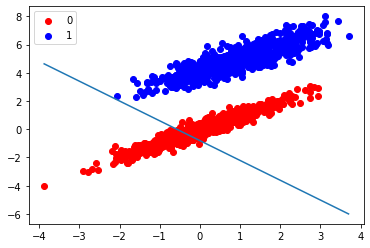

In [ ]:
w = np.random.rand(len(x_train[0]))

show_plt(w, x_train, y_train)

The weights are: [-1571.62826666 -1105.33492813  1474.79667778]


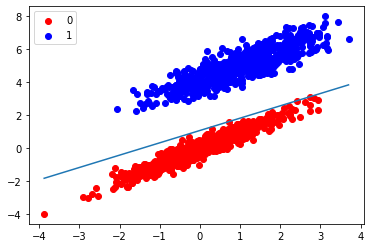

In [ ]:
w, min_epoch = train_perceptron(w, x_train, y_train)

print("The weights are:", w)

# Do not change -->
lab1_student_answer_w2 = w
lab1_stduent_answer_min_epoch = min_epoch
# <--
show_plt(w, x_train, y_train)

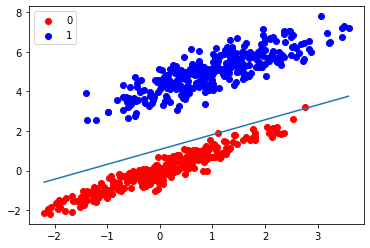

In [ ]:
show_plt(w, x_test, y_test)

## Practice 3

hyperplane이 구해지는 최소 epoch를 줄일 수 있도록 train_perceptron 코드를 수정하시오.

In [ ]:
# Todo: practice 3
# y의 값으로 0과 1이 입력되는데, 0은 -1로, 1은 1로 변환하여 알고리즘을 구현하였습니다.
# peactice 2를 통해 실험해본 결과, epoch가 늘어나는 가장 큰 이유는
# 원소의 개수가 많아질수록 동일한 기울기더라도 w의 크기가 커지게 되고, 이 때문에
# misclassify되는 원소가 적은 경우 w의 갱신이 너무 적게 일어난다는 것이었습니다.
# 때문에 update를 하는 경우에 misclassify된 원소의 개수를 통해 scaling을 해줌으로써 
# 이를 해결할 수 있으리라 생각하였습니다.
# 또한 추가적으로 learning rate나 Momentum등의 방법을 도입해 보았지만,
# 단순한 분포의 저차원 데이터와 linear classifiyer 구조에서는 
# local optimna에 빠지거나 overfitting되는 상황이 잘 생기지 않았고,
# 극적인 성능향상이 있지 않았습니다. (scaliing 방법 없이 실행하는 경우 오히려 성능이 낮았습니다)
# 때문에 굳이 어려운 알고리즘들을 추가적으로 도입하지 않아도
# scaling factor가 충분히 그 역할을 수행하였고, 안정적인 성능 향상을 보였습니다.
def train_perceptron(w, x, y, epoch=30):
    min_epoch = epoch

    # y의 값 중 0인 경우 -1로 변환합니다.
    y[y<0.5] = -1 
    
    # epoch에 도달할 때까지 weight의 update를 수행합니다.
    for i in range(epoch): 

        # y가 (n,)의 형태로 1차원임으로 연산과정에서 brodecasting이 정상적으로 수행되지 않습니다.
        # 때문에 reshape 함수를 사용하여 1차원을 증가시켜 (n,1)으로 형태를 변환합니다.
        y = y.reshape(-1,1) 

        # y와 x의 element wise 곱 연산을 수행합니다.
        # y는 x의 크기로 broadcast 됩니다.
        yx = x*y

        # weight w와 yx를 dot product 합니다.
        # 이제 error에 해당하는 값들은 연산 결과가 음수일 것입니다.
        # y⋅w⋅x >= 0 (good)
        # y⋅w⋅x >= 0 (misclassified)
        wyx = np.dot(yx,w)

        # 만약 wyx 중 음수가 없다면 missclassify 된 원소가 없다는 뜻이고, 더이상 w의 갱신이 이루어지지 않습니다.
        # 즉 Hyperplane이 구해지는 최소 epoch, min_epoch는 현재 i가 됩니다. (i가 0부터 시작하기 때문에 1을 뺄 필요가 없습니다)
        # Practice의 조건으로 최소 epoch를 구하되, w는 epoch만큼 update를 하라고 명시되어 있음으로,
        # 먼저 min_epoch가 이전에 minimum으로 갱신된 적이 있는지 확인하고,
        # any 함수를 사용해 wyx 배열에 음수가 있는지 확인합니다.
        if min_epoch > i and not np.any(wyx<0):
            min_epoch = i

        # wyx의 값이 음수인 index들만 update에 사용됨으로 해당 값들만을 따로 저장합니다.
        yx = yx[wyx<0]

        # misclassified 된 원소들의 yx 값들을 모두 summation 한 후 w에 더해줍니다.
        # 이때 missclassify된 원소의 개수로 나누어줌으로써 scaling을 해줍니다.
        # 원소의 개수를 세기 위해서 (wyx<0) 계산 결과에 count_nonzero 함수를 사용하여 counting 해주었습니다.
        # 이때 count_nonzero의 결과가 0인 경우, division by zero error가 발생함으로 값 eta을 더해줍니다.
        # 아래 블록에서 실험을 한 결과, eta 값이 100정도일 때 평균 epoch가 5정도로 가장 적었습니다.
        # 이러한 이유는 eta가 작다면, missclassify된 원소가 작은 경우에 비율이 커지거나 동일하게 적용되고, 
        # 특정 원소에 의해서 과하게 기울기가 변화하기 때문으로 보입니다.
        # 다른 방법으로 learning rate를 사용해 보았지만, 그다지 좋은 성능 향상이 나타나지 않았습니다.
        w += (1/(np.count_nonzero(wyx<0)+100))*yx.sum(axis = 0)
    
    # -1로 변환해주었던 값을 다시 0으로 되돌려 줍니다.
    y[y<-0.5] = 0


    # 만약 epoch가 0에서 종료한 경우, min_epoch가 -1임으로, 이 경우 0으로 바꿔줍니다.
    if min_epoch < 0 :
        min_epoch = 0

    
    # 계산된 w와 min_epoch를 return 합니다.
    return w, min_epoch

In [ ]:
""" 
# 적절한 eta를 찾기위한 실험용 코드입니다.
def train_perceptron_test2(w, x, y, eta, epoch=30):
    min_epoch = epoch
    y[y<0.5] = -1 
    for i in range(epoch): 
        y = y.reshape(-1,1) 
        yx = x*y
        wyx = np.dot(yx,w)
        if min_epoch > i-1 and not np.any(wyx<0):
            min_epoch = i-1
        yx = yx[wyx<0]
        w += (1/(np.count_nonzero(wyx<0)+eta))*yx.sum(axis = 0)
    y[y<-0.5] = 0
    if min_epoch < 0 :
        min_epoch = 0
    return w, min_epoch

for ii in range(20):
    i = ii+90
    temp = 0
    for j in range(500):
        w = np.random.rand(len(x_train[0]))
        w, min_epoch = train_perceptron_test(w, x_train, y_train, i)
        temp += min_epoch
    print(f'{i} : {temp/500}')
"""

" \n# 적절한 eta를 찾기위한 실험용 코드입니다.\ndef train_perceptron_test2(w, x, y, eta, epoch=30):\n    min_epoch = epoch\n    y[y<0.5] = -1 \n    for i in range(epoch): \n        y = y.reshape(-1,1) \n        yx = x*y\n        wyx = np.dot(yx,w)\n        if min_epoch > i-1 and not np.any(wyx<0):\n            min_epoch = i-1\n        yx = yx[wyx<0]\n        w += (1/(np.count_nonzero(wyx<0)+eta))*yx.sum(axis = 0)\n    y[y<-0.5] = 0\n    if min_epoch < 0 :\n        min_epoch = 0\n    return w, min_epoch\n\nfor ii in range(20):\n    i = ii+90\n    temp = 0\n    for j in range(500):\n        w = np.random.rand(len(x_train[0]))\n        w, min_epoch = train_perceptron_test(w, x_train, y_train, i)\n        temp += min_epoch\n    print(f'{i} : {temp/500}')\n"

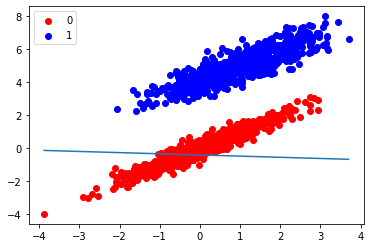

In [ ]:
w = np.random.rand(len(x_train[0]))
show_plt(w, x_train, y_train)

The weights are: [-0.46553358 -0.34527598  0.40160276]


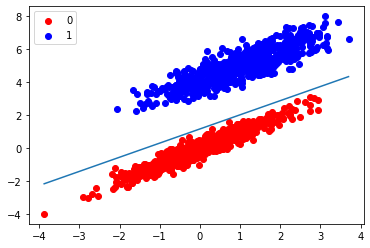

In [ ]:
w, min_epoch = train_perceptron(w, x_train, y_train)

print("The weights are:", w)
# Do not change -->
lab1_student_answer_w3 = w
lab1_stduent_answer_min_epoch3 = min_epoch
# <--
show_plt(w, x_train, y_train)

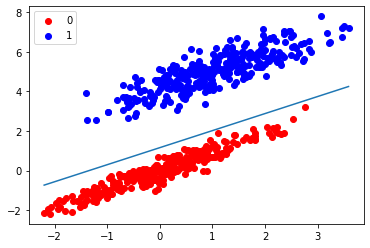

In [ ]:
show_plt(w, x_test, y_test)

수고하셨습니다. 

조교메일: cvipsj@sogang.ac.kr

# 정답 확인용

수정금지 - 조교

In [ ]:
print(f'학번: {lab1_student_id}')
print(f'이름: {lab1_student_name}')

학번: 20161641
이름: 정성엽


In [ ]:
print(f'Answer of practice 1: {abs(sum(lab1_student_answer_w - [-4.179, -2.512, 3.055])) < 0.01}')

Answer of practice 1: False


In [ ]:
print(f'Answer of practice 2: {abs(sum(lab1_student_answer_w2 - [-6.628, -4.476, 5.423])) < 0.01}')
print(f'Min epochs at practice 2: {lab1_stduent_answer_min_epoch}')

Answer of practice 2: False
Min epochs at practice 2: 22


In [ ]:
print(f'Answer of practice 2: {lab1_student_answer_w3}')
print(f'Min epochs at practice 2: {lab1_stduent_answer_min_epoch3}')

Answer of practice 2: [-0.46553358 -0.34527598  0.40160276]
Min epochs at practice 2: 1
